# Web Scraping Demo

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
requests.get(f"https://www.ambitionbox.com/list-of-companies?page=1").text

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;8c94d817&#46;1730776791&#46;517e041a\n<P>https&#58;&#47;&#47;errors&#46;edgesuite&#46;net&#47;18&#46;8c94d817&#46;1730776791&#46;517e041a</P>\n</BODY>\n</HTML>\n'

Since we are getting an error, we can disguise as being opened from a browser

In [3]:
# headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}

web_page = requests.get(f"https://www.ambitionbox.com/list-of-companies?page=1", headers=headers, timeout=10).text

web_page

ReadTimeout: HTTPSConnectionPool(host='www.ambitionbox.com', port=443): Read timed out. (read timeout=10)

In [ ]:
# soup = BeautifulSoup(web_page, 'lxml')

## Run above code instead of reading the file from .html

In [47]:
with open('scraped_website.html', 'r', encoding='utf-8') as file:
    soup = file.read()

In [48]:
# Parse the HTML content with Beautiful Soup
soup = BeautifulSoup(soup, 'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width: 767px) {
        .trp-img {
            width: 400px !important;
            max-width: 400px !important
        }
    }
  </style>
  <script>
   window.dataLayer = window.dataLayer || [], window.gtag = window.gtag || function () {
        window.dataLayer.push(arguments)
    }, gtag("js", new Date), window.initialDate = (new Date).toISOString()
  </script>
  <script type="text/partytown">
   window.dataLayer = window.dataLayer || [];
      window.gtag = function() {
      	window.dataLayer.push(arguments);
      };
      gtag('js', new Date(window.initialDate));
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="20
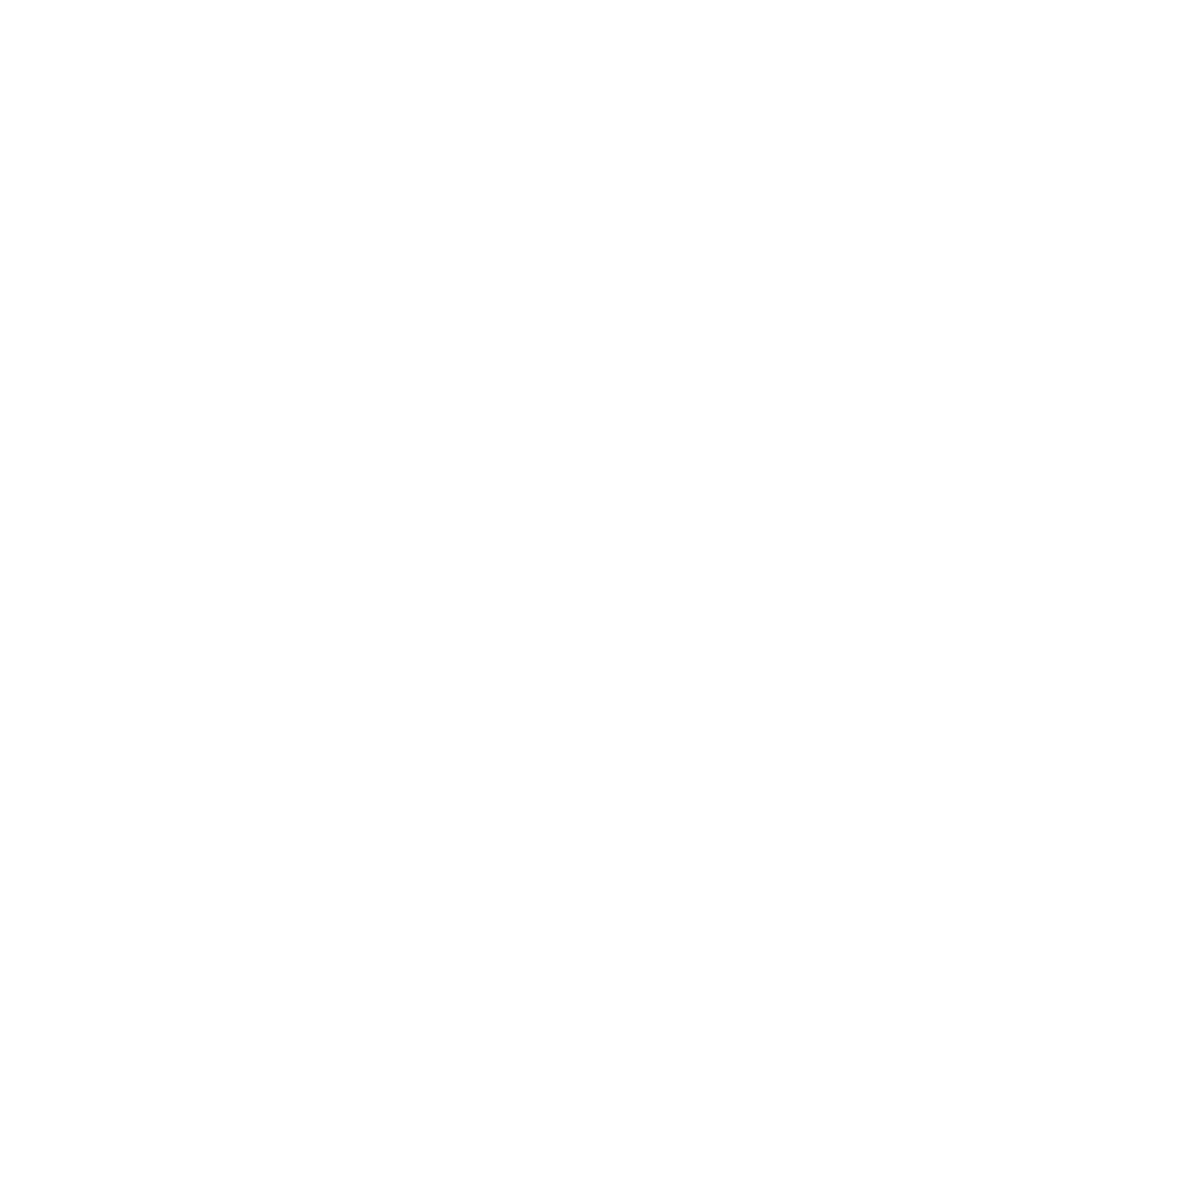

In [49]:
# Use soup.prettify() to format the HTML
formatted_html = soup.prettify()

# Print or work with the formatted HTML
print(formatted_html)

In [50]:
soup.findAll('h1')

[<h1 class="companyListing__title">
                                         List of companies in India
                                     </h1>]

In [51]:
soup.findAll('h1')[0].text.strip()

'List of companies in India'

In [52]:
len(soup.findAll('h2'))

24

In [53]:
soup.findAll('h2')

[<h2 class="companyCardWrapper__companyName" title="TCS">
                                                                     TCS
                                                                 </h2>,
 <h2 class="companyCardWrapper__companyName" title="Accenture">
                                                                         Accenture
                                                                     </h2>,
 <h2 class="companyCardWrapper__companyName" title="Cognizant">
                                                                     Cognizant
                                                                 </h2>,
 <h2 class="companyCardWrapper__companyName" title="Wipro">
                                                                     Wipro
                                                                 </h2>,
 <h2 class="companyCardWrapper__companyName" title="Capgemini">
                                                                     Capgemini
         

In [54]:
for i in soup.findAll('h2'):
    print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
Capgemini
HDFC Bank
ICICI Bank
Infosys
HCLTech
Tech Mahindra
Genpact
Teleperformance
Concentrix Corporation
Axis Bank
Amazon
Jio
IBM
Reliance Retail
HDB Financial Services
iEnergizer
Companies by Industry
Companies by Locations
Companies by Type
Companies by Badges


In [55]:
for i in soup.findAll('span'):
    print(i.text.strip())

+

Companies
Reviews
Salaries
Interviews
Awards
All Filters








10,71,437
							unique
							companies found

Follow
3.7
IT Services & Consulting | 1 Lakh+ Employees | Public | 56 years old | Mumbai +365 more
Highly Rated For
Job Security, Work Life Balance
Critically Rated For
Promotions / Appraisal, Salary & Benefits, Work Satisfaction
81.8k
Reviews
8.9L
Salaries
9.6k
Interviews
30
Jobs
11.8k
Benefits
85
Photos
Follow
3.9
IT Services & Consulting | 1 Lakh+ Employees | Public | 35 years old | Dublin +187 more
Highly Rated For
Company Culture, Job Security, Skill Development / Learning
Critically Rated For
Promotions / Appraisal
51k
Reviews
6L
Salaries
7.3k
Interviews
21.5k
Jobs
7.3k
Benefits
38
Photos

Follow
3.8
IT Services & Consulting | 1 Lakh+ Employees | Forbes Global 2000 | 30 years old | Teaneck. New Jersey. +184 more
Critically Rated For
Promotions / Appraisal
46k
Reviews
5.8L
Salaries
5.2k
Interviews
544
Jobs
6k
Benefits
69
Photos

Follow
3.7
IT Services & Consulting | 

In [56]:
len(soup.find_all('span', class_='companyCardWrapper__companyRatingValue'))

20

In [57]:
len(soup.findAll('span', class_="companyCardWrapper__ActionCount"))

120

In [58]:
company = soup.find_all('div', class_='companyCardWrapper')
len(company)

20

In [99]:
name = []
rating = []
reviews = []
highly_rated_for = []
critically_rated_for = []

for i in company:
    try:
        name.append(i.find('h2').text.strip())
        rating.append(i.find('span', class_='companyCardWrapper__companyRatingValue').text.strip())
        reviews.append(i.find('span', class_='companyCardWrapper__ActionCount').text.strip())

        # Try to get the "highly rated" and "critically rated" values
        ratings = i.find_all('span', class_='companyCardWrapper__ratingValues')
        highly_rated_for.append(ratings[0].text.strip())
        critically_rated_for.append(ratings[1].text.strip())

    except IndexError:
        # Handle cases where there are not enough 'ratingValues' spans
        if len(ratings) < 2:
            highly_rated_for.append(ratings[0].text.strip())  # Only one rating exists
            critically_rated_for.append("N/A")  # No second rating available
        else:
            highly_rated_for.append("N/A")
            critically_rated_for.append("N/A")

In [100]:
print(name)

['TCS', 'Accenture', 'Cognizant', 'Wipro', 'Capgemini', 'HDFC Bank', 'ICICI Bank', 'Infosys', 'HCLTech', 'Tech Mahindra', 'Genpact', 'Teleperformance', 'Concentrix Corporation', 'Axis Bank', 'Amazon', 'Jio', 'IBM', 'Reliance Retail', 'HDB Financial Services', 'iEnergizer']


In [101]:
print(rating)

['3.7', '3.9', '3.8', '3.7', '3.8', '3.9', '4.0', '3.7', '3.6', '3.6', '3.9', '3.9', '3.8', '3.8', '4.1', '3.9', '4.1', '3.9', '4.0', '4.7']


In [102]:
print(reviews)

['81.8k', '51k', '46k', '45.9k', '37.9k', '36.7k', '36k', '35.5k', '32.7k', '30.1k', '28.6k', '26k', '24.5k', '23.7k', '23.7k', '21.3k', '20.8k', '20.8k', '19.1k', '19.1k']


In [103]:
print(company[0].find_all('span', class_='companyCardWrapper__ratingValues')[1])

<span class="companyCardWrapper__ratingValues">Promotions / Appraisal, Salary &amp; Benefits, Work Satisfaction</span>


In [104]:
print(highly_rated_for)

['Job Security, Work Life Balance', 'Company Culture, Job Security, Skill Development / Learning', 'Promotions / Appraisal', 'Promotions / Appraisal', 'Job Security', 'Job Security, Work Life Balance, Skill Development / Learning', 'Job Security, Skill Development / Learning', 'Job Security, Skill Development / Learning, Company Culture', 'Job Security, Skill Development / Learning, Company Culture', 'Job Security, Company Culture, Skill Development / Learning', 'Job Security', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Job Security, Work Life Balance, Skill Development / Learning', 'Skill Development / Learning', 'Skill Development / Learning', 'Job Security', 'Job Security', 'Company Culture, Salary & Benefits, Work Life Balance', 'Company Culture, Salary & Benefits, Work Life Balance', 'Job Security, Skill Development / Learning', 'Work Life Balance, Job Security, Skill Development / Learning', 'Sk

In [105]:
print(critically_rated_for)

['Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'Promotions / Appraisal', 'N/A', 'Promotions / Appraisal, Salary & Benefits', 'Promotions / Appraisal, Salary & Benefits', 'Promotions / Appraisal', 'N/A', 'Promotions / Appraisal, Salary & Benefits', 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction', 'N/A', 'Promotions / Appraisal, Salary & Benefits', 'N/A', 'Promotions / Appraisal, Salary & Benefits', 'Promotions / Appraisal', 'N/A', 'Promotions / Appraisal', 'Promotions / Appraisal', 'Promotions / Appraisal', 'Promotions / Appraisal', 'N/A']


In [113]:
d = {'name': name,
     'rating':rating,
     'reviews':reviews,
     'Highly Rated For':highly_rated_for[:len(name)],
     'Critically Rated For':critically_rated_for}

df = pd.DataFrame(d)

In [114]:
print("Names:", len(name))
print("Ratings:", len(rating))
print("Reviews:", len(reviews))
print("Highly Rated For:", len(highly_rated_for))
print("Critically Rated For:", len(critically_rated_for))

Names: 20
Ratings: 20
Reviews: 20
Highly Rated For: 26
Critically Rated For: 20


In [115]:
df

,name,rating,reviews,Highly Rated For,Critically Rated For
0,TCS,3.7,81.8k,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits, Wor..."
1,Accenture,3.9,51k,"Company Culture, Job Security, Skill Developme...",Promotions / Appraisal
2,Cognizant,3.8,46k,Promotions / Appraisal,N/A
3,Wipro,3.7,45.9k,Promotions / Appraisal,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,3.8,37.9k,Job Security,"Promotions / Appraisal, Salary & Benefits"
5,HDFC Bank,3.9,36.7k,"Job Security, Work Life Balance, Skill Develop...",Promotions / Appraisal
6,ICICI Bank,4.0,36k,"Job Security, Skill Development / Learning",N/A
7,Infosys,3.7,35.5k,"Job Security, Skill Development / Learning, Co...","Promotions / Appraisal, Salary & Benefits"
8,HCLTech,3.6,32.7k,"Job Security, Skill Development / Learning, Co...","Promotions / Appraisal, Salary & Benefits, Wor..."
9,Tech Mahindra,3.6,30.1k,"Job Security, Company Culture, Skill Developme...",N/A


In [ ]:
final = pd.DataFrame()

for j in range(1, 11):
    url = f"https://www.ambitionbox.com/list-of-companies?page={j}"
    
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    
    web_page = requests.get(url, headers=headers, timeout=10).text
    
    soup = BeautifulSoup(web_page, 'lxml')
    
    company = soup.find_all('div', class_='companyCardWrapper')
    
    name = []
    rating = []
    reviews = []
    highly_rated_for = []
    critically_rated_for = []
    
    for i in company:
        try:
            name.append(i.find('h2').text.strip())
            rating.append(i.find('span', class_='companyCardWrapper__companyRatingValue').text.strip())
            reviews.append(i.find('span', class_='companyCardWrapper__ActionCount').text.strip())
    
            # Try to get the "highly rated" and "critically rated" values
            ratings = i.find_all('span', class_='companyCardWrapper__ratingValues')
            highly_rated_for.append(ratings[0].text.strip())
            critically_rated_for.append(ratings[1].text.strip())
    
        except IndexError:
            # Handle cases where there are not enough 'ratingValues' spans
            if len(ratings) < 2:
                highly_rated_for.append(ratings[0].text.strip())  # Only one rating exists
                critically_rated_for.append("N/A")  # No second rating available
            else:
                highly_rated_for.append("N/A")
                critically_rated_for.append("N/A")
                
    d = {'name': name,
     'rating':rating,
     'reviews':reviews,
     'Highly Rated For':highly_rated_for[:len(name)],
     'Critically Rated For':critically_rated_for}

    df = pd.DataFrame(d)
    
    final = final._append(df, ignore_index=True)